### LDA

In [35]:
# pip install pyLDAvis

In [10]:
from lda_model import LDAModel
import csv
import pandas as pd

# LDAModel 클래스의 인스턴스 생성
lda = LDAModel()

# CSV 파일에서 리뷰 데이터 읽기

# 다른 변수가 있으면 따로 추가
reviews = []
csv_file_path = 'your_reviews.csv'  # CSV 파일 경로
with open(csv_file_path, 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        # CSV 파일에서 리뷰 데이터를 추출하여 리스트에 추가
        reviews.append(row[0])  # 여기서 row[0]은 리뷰가 있는 열에 해당하는 것으로 수정

df = pd.DataFrame({
    'reviews': reviews,
}) # 다른 변수가 있으면 따로 추가        

In [2]:
# 필요한 속성 설정
lda.reviews = reviews
lda.stopwords_path = "korean_stopwords.txt" # 불용어 사전 txt 로드
lda.additional_stopwords = ['additional', 'stopwords', 'here'] # 추가적인 stopwords 추가


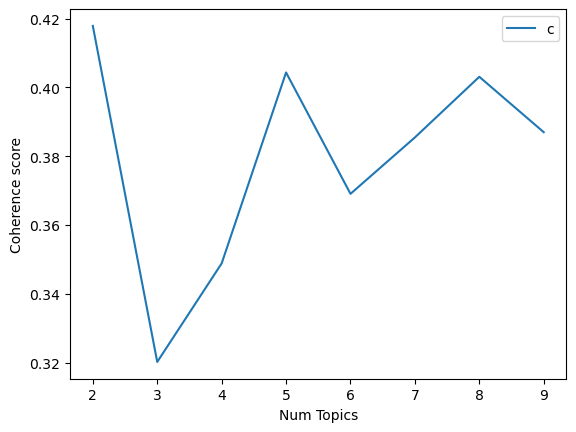

(<gensim.models.ldamulticore.LdaMulticore at 0x1c3ca01d510>,
 [(0,
   [('스마트폰', 0.035774358),
    ('글로벌', 0.03571048),
    ('개최', 0.017941888),
    ('중심', 0.017922858),
    ('전략', 0.017917762),
    ('산업', 0.01791653),
    ('세대', 0.017877765),
    ('활성화', 0.017872354),
    ('실적', 0.017869469),
    ('수주', 0.017857129)]),
  (1,
   [('헤드라인', 0.062533855),
    ('오프라인', 0.06217519),
    ('휴대폰', 0.03897466),
    ('온라인', 0.038937386),
    ('공매도', 0.038918745),
    ('개통', 0.03888556),
    ('포화', 0.038712133),
    ('산', 0.038483918),
    ('종목', 0.038399093),
    ('폭탄', 0.038323164)])])

In [3]:
# lda_modeling 메서드 호출하여 LDA 모델 생성
optimal_model, model_topics = lda.lda_modeling()
# optimal_model, model_topics


In [5]:
import pandas as pd
document_topics_df = lda.document_topics_probability(optimal_model, lda.corpus_tfidf, pd.Series(reviews, name='title'))

In [7]:
lda.visualize_lda_model(optimal_model)

### SNA

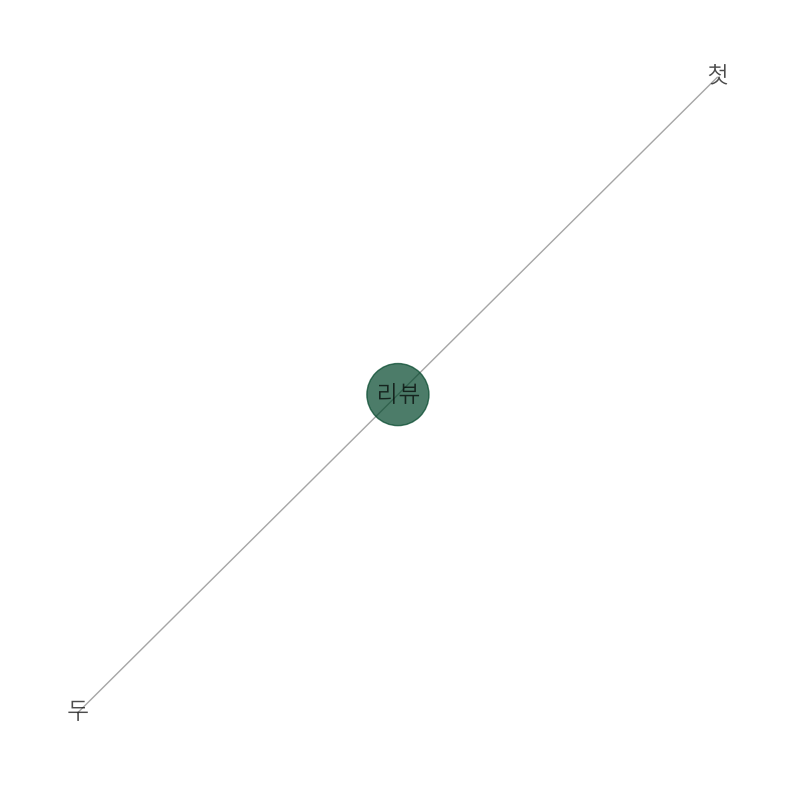

In [1]:
from SNA import SNA
import matplotlib.pyplot as plt

# SNA 객체 생성
sna = SNA()

# 데이터 설정 및 처리
sna.reviews = [
    "첫 번째 리뷰입니다.",
    "두 번째 리뷰입니다."
]  # 실제 데이터를 채워넣으세요

# reviews = []
# csv_file_path = 'your_reviews.csv'  # CSV 파일 경로
# with open(csv_file_path, 'r', encoding='utf-8') as file:
#     csv_reader = csv.reader(file)
#     for row in csv_reader:
#         # CSV 파일에서 리뷰 데이터를 추출하여 리스트에 추가
#         reviews.append(row[0])  # 여기서 row[0]은 리뷰가 있는 열에 해당하는 것으로 수정

# sna.reviews = reviews

# sna.stopwords_path = "korean_stopwords.txt"  # 불용어 사전 파일 경로 설정
sna.additional_stopwords = ['additional', 'stopwords', 'here']

# 전처리된 단어 리스트 생성
word_list = sna.preprocess_reviews()

# 연관 규칙 생성
association_rules = sna.generate_association_rules(word_list)

# 네트워크 그래프 시각화
sna.visualize_network_graph(association_rules['items'])
plt.show()
